In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [2]:
#import data and create data frame
df = pd.read_csv("Supermarket_Customers_data_v2.csv", delimiter=';')

df.rename(columns = {'Spending Score (1-100): Score assigned by the shop based on customer behavior and spending nature':'Spending Score (1-100)'}, inplace = True)
df["Sex"]=np.where(df["Sex"]=="Male",0,1)

In [4]:
from sklearn.cluster import KMeans
from sklearn import datasets
import numpy as np

#iris = datasets.load_iris()
#X = iris.data[:, :2]


#Clusters plotted: Annual Income against Spending Score
X = df.iloc[:, [3,4]].values
X[0:4]


iterations = 300
centroids = None
arr = []
for i in range(iterations):
    kmeans = KMeans(
        max_iter=1,
        n_init=1,
        init=(centroids if centroids is not None else 'k-means++'),
        n_clusters=4,
        random_state=0)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    arr.append(centroids)

In [7]:
#Clusters plotted: Annual Income against Spending Score
X = df.iloc[:, [3,4]].values
X[0:4]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
kmeans.n_clusters
y_kmeans = kmeans.fit_predict(X)
type(y_kmeans)


df['cluster'] = y_kmeans

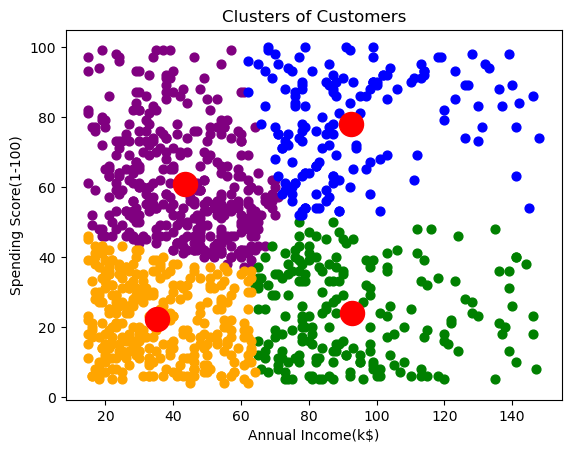

In [8]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=40, c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=40, c='green', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=40, c='blue', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=40, c='orange', label ='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

# Show centroids movement over 300 iterations

[]


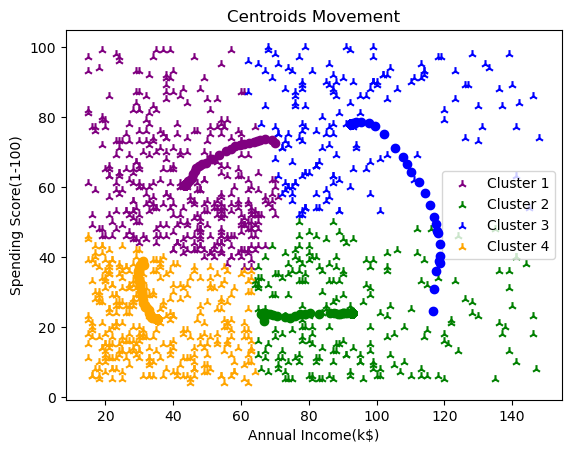

In [9]:
import matplotlib.pyplot as plt


colors = ['purple', 'green', 'orange', 'blue']
arr1x=[]
arr1y=[]

print(arr1x)
for i in range(len(arr)):
    #arr1x.append(arr[i][1][0])
    #arr1y.append(arr[i][1][1])
    for k in range(len(arr[0])): 
        plt.scatter(arr[i][k][0], arr[i][k][1], zorder=10, c=colors[k])
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=40, marker="2", c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=40, marker="2", c='green', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=40, marker="2", c='blue', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=40, marker="2", c='orange', label ='Cluster 4')
plt.title('Centroids Movement')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

# Centroids Animation

<IPython.core.display.Javascript object>


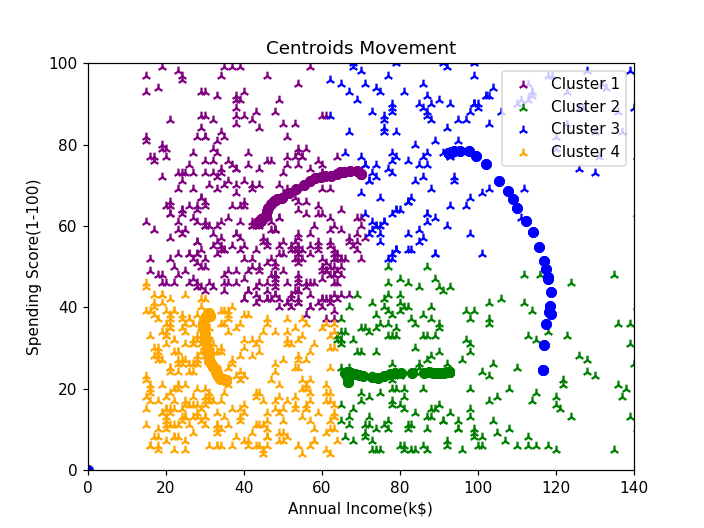

[70.15116279069768, 69.03536977491963, 67.16498316498317]


In [13]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.animation as animation

colors = ['purple', 'green', 'orange', 'blue']
arr1x=[]
arr1y=[]
arr2x=[]
arr2y=[]
arr3x=[]
arr3y=[]
arr4x=[]
arr4y=[]


for i in range(len(arr)):
    arr1x.append(arr[i][0][0])
    arr1y.append(arr[i][0][1])
    arr2x.append(arr[i][1][0])
    arr2y.append(arr[i][1][1])
    arr3x.append(arr[i][2][0])
    arr3y.append(arr[i][2][1])
    arr4x.append(arr[i][3][0])
    arr4y.append(arr[i][3][1])
    #for k in range(len(arr[0])): 
        #plt.scatter(arr[i][k][0], arr[i][k][1], zorder=10, c=colors[k])
    
fig, ax = plt.subplots()
ax.set_xlim([0, 140])
ax.set_ylim([0, 100])

scat1 = ax.scatter(0, 0, c=colors[0])
scat2 = ax.scatter(0, 0, c=colors[1])
scat3 = ax.scatter(0, 0, c=colors[2])
scat4 = ax.scatter(0, 0, c=colors[3])

print(arr1x[:3])

def animate(i):
    scat1 = ax.scatter(arr1x[i], arr1y[i], c=colors[0])
    scat2 = ax.scatter(arr2x[i], arr2y[i], c=colors[1])
    scat3 = ax.scatter(arr3x[i], arr3y[i], c=colors[2])
    scat4 = ax.scatter(arr4x[i], arr4y[i], c=colors[3])
    return scat1, scat2, scat3, scat4

ani = animation.FuncAnimation(fig, animate, repeat=True,
                                    frames=70, interval=50, repeat_delay=1000)

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=40, marker="2", c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=40, marker="2", c='green', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=40, marker="2", c='blue', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=40, marker="2", c='orange', label ='Cluster 4')
plt.title('Centroids Movement')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()

#To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=10,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('scatter.gif', writer=writer)

plt.show()